# Project1: Road Accident Severity Classification¶

## Index
1. [Objective](#objective)
2. [Data](#data)
3. [Loading Necessary Libraries](#loading-necessary-libraries)
4. [Function Definations](#function-definations)
5. [Reading in the Dataset](#reading-in-the-dataset)
6. [Exploratory Descriptive Analysis](#exploratory-descriptive-analysiseda)
    1. [Basic Data Inspection](#basic-data-inspection)
    2. [Renaming column names to lowercase](#renaming-column-names-to-lowercase)
    3. [Descriptive Statistics](#descriptive-statistics)
    4. [Duplicate Values](#duplicate-values)
    5. [Missing Values](#missing-values)
    6. [Unique Values](#unique-values)
    7. [Exploring Target Variable](#exploring-target-variable)

## Objective

## Data

## Loading necessary libraries
- NumPy: A library for numerical operations in Python.
- Pandas: A powerful library for data manipulation and analysis.
- Matplotlib: A library for creating static, interactive, and animated visualizations in Python.
- Seaborn: A data visualization library based on Matplotlib for making attractive and informative statistical graphics.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the version of the library installed in the Environment. 
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Matplotlib plots appear directly within the notebook, enhancing the interactivity
%matplotlib inline

# Dark visual theme and dark color palette for Seaborn plots.
sns.set_theme(style="dark")
sns.set_palette("dark")


# Suppresssing non-critical warnings to maintain clean and uncluttered output for better readability.
import warnings
warnings.filterwarnings('ignore')

# Display all columns without truncation
pd.set_option('display.max_columns', None)

Numpy version: 1.25.2
Pandas version: 2.1.0
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


## Function Definations
- Function prints the number of columns in a DataFrame and lists their names in square brackets, separated by commas.<br>
Function calling: ```columns_in_a_dataframe(dataframe)```

In [84]:
# 1. Function prints the number of columns in a DataFrame and lists their names in square brackets, separated by commas. 
def columns_in_a_dataframe(dataframe):

    dataframe_columns = dataframe.columns.tolist()
    print(f"Number of columns: {len(dataframe_columns)}")
    print(f"{dataframe_columns}\n")


# 2. Function distinguishes columns in a DataFrame based on their data types
def distinguish_column_ac_to_datatype(dataframe):
    data_types = {
        'Numerical': ['number'],
        'Categorical': ['category', 'object'],
        'Datetime': ['datetime', 'datetime64[ns]']
    }
    
    for dtype, dtype_list in data_types.items():
        columns = dataframe.select_dtypes(include=dtype_list).columns.tolist()
        if columns:
            print(f"Number of {dtype} columns: {len(columns)}")
            print(f"{columns}\n")
        else:
            print(f"No {dtype} column in your dataframe")


# 3. Function prints the number of missing value and percentage of missing values for each column having atleast one missing value
def missing_values_table(df):
        
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


# 4. Function prints unique values for each column when unique values in that column is less than or equal to max_unique_values.
def unique_values_per_column(dataframe, max_unique_values):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        
        if len(unique_values) <= max_unique_values:
            print(f"Column: {column}")
            print(f"Number of Unique values: {len(unique_values)}")
            print(f"Unique values: {', '.join(map(str, unique_values))}\n")

## Reading in the Dataset

In [36]:
df = pd.read_csv('..\Datasets\RTA Dataset.csv')

## Exploratory Descriptive Analysis(EDA)

### Basic Data Inspection

In [37]:
df_eda = df.copy(deep=True)

In [38]:
df_eda.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [39]:
df_eda.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [40]:
df_eda.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
925,15:30:00,Friday,31-50,Male,Elementary school,Owner,Above 10yr,Long lorry,Owner,Unknown,No defect,Office areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,4,5,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
7885,18:45:00,Saturday,Unknown,Male,Junior high school,Employee,5-10yr,Automobile,Owner,2-5yrs,No defect,Other,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,3,NaN,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1896,17:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,1,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11655,15:46:00,Thursday,31-50,Male,Elementary school,Owner,5-10yr,Long lorry,Governmental,5-10yrs,No defect,Other,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
538,21:20:00,Saturday,Under 18,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,NaN,Office areas,Double carriageway (median),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,2,Going straight,Pedestrian,Female,Under 18,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Overspeed,Serious Injury


In [41]:
print(f"Shape of dataframe: {df_eda.shape}")

Shape of dataframe: (12316, 32)


In [50]:
columns_in_a_dataframe(df_eda) # function defined above.
distinguish_column_ac_to_datatype(df_eda) # function defined above

Number of columns: 32
['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

Number of Numerical columns: 2
['Number_of_vehicles_involved', 'Number_of_casualties']

Number of Categorical columns: 30
['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 

In [51]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### Renaming column names to lowercase

In [52]:
df_eda.rename(columns=lambda x: x.lower(), inplace=True)
columns_in_a_dataframe(df_eda) # function defined above

Number of columns: 32
['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'number_of_vehicles_involved', 'number_of_casualties', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity']



### Descriptive Statistics

In [63]:
# Numerical Columns Statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [64]:
# Categorical Columns Statistics
df_eda.describe(include='O').T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
age_band_of_driver,12316,5,18-30,4271
sex_of_driver,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
type_of_vehicle,11366,17,Automobile,3205
owner_of_vehicle,11834,4,Owner,10459
service_year_of_vehicle,8388,6,Unknown,2883


### Duplicate Values

In [67]:
print(f"Number of duplicate instances in the dataset: {df.duplicated().sum()}")

Number of duplicate instances in the dataset: 0


### Missing Values

In [70]:
df_eda.isnull().sum().sort_values(ascending=False)

defect_of_vehicle              4427
service_year_of_vehicle        3928
work_of_casuality              3198
fitness_of_casuality           2635
type_of_vehicle                 950
types_of_junction               887
driving_experience              829
educational_level               741
vehicle_driver_relation         579
owner_of_vehicle                482
lanes_or_medians                385
vehicle_movement                308
area_accident_occured           239
road_surface_type               172
type_of_collision               155
road_allignment                 142
casualty_class                    0
pedestrian_movement               0
cause_of_accident                 0
casualty_severity                 0
age_band_of_casualty              0
sex_of_casualty                   0
time                              0
road_surface_conditions           0
number_of_casualties              0
number_of_vehicles_involved       0
weather_conditions                0
light_conditions            

In [81]:
missing_values_table(df_eda)

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
defect_of_vehicle,4427,35.9
service_year_of_vehicle,3928,31.9
work_of_casuality,3198,26.0
fitness_of_casuality,2635,21.4
type_of_vehicle,950,7.7
types_of_junction,887,7.2
driving_experience,829,6.7
educational_level,741,6.0
vehicle_driver_relation,579,4.7
owner_of_vehicle,482,3.9


### Unique Values

In [87]:
df_eda.nunique().sort_values(ascending=False)

time                           1074
cause_of_accident                20
type_of_vehicle                  17
area_accident_occured            14
vehicle_movement                 13
type_of_collision                10
pedestrian_movement               9
weather_conditions                9
road_allignment                   9
types_of_junction                 8
number_of_casualties              8
work_of_casuality                 7
lanes_or_medians                  7
day_of_week                       7
driving_experience                7
educational_level                 7
service_year_of_vehicle           6
age_band_of_casualty              6
number_of_vehicles_involved       6
fitness_of_casuality              5
road_surface_type                 5
age_band_of_driver                5
casualty_severity                 4
road_surface_conditions           4
casualty_class                    4
light_conditions                  4
owner_of_vehicle                  4
vehicle_driver_relation     

In [88]:
unique_values_per_column(df_eda,20) #Function defined above

Column: day_of_week
Number of Unique values: 7
Unique values: Monday, Sunday, Friday, Wednesday, Saturday, Thursday, Tuesday

Column: age_band_of_driver
Number of Unique values: 5
Unique values: 18-30, 31-50, Under 18, Over 51, Unknown

Column: sex_of_driver
Number of Unique values: 3
Unique values: Male, Female, Unknown

Column: educational_level
Number of Unique values: 8
Unique values: Above high school, Junior high school, nan, Elementary school, High school, Unknown, Illiterate, Writing & reading

Column: vehicle_driver_relation
Number of Unique values: 5
Unique values: Employee, Unknown, Owner, nan, Other

Column: driving_experience
Number of Unique values: 8
Unique values: 1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Licence, Below 1yr, unknown

Column: type_of_vehicle
Number of Unique values: 18
Unique values: Automobile, Public (> 45 seats), Lorry (41?100Q), nan, Public (13?45 seats), Lorry (11?40Q), Long lorry, Public (12 seats), Taxi, Pick up upto 10Q, Stationwagen, Ridden hors

Column: ```work_of_casuality``` doesn't seems relevant in predicting the target variable.<br>

Inconsistencies in dataset:
- Column: ```fitness_of_casuality``` has a value ```NormalNormal``` which I believe is the same as the value ```Normal```.
- Column: ```defect_of_vehicle``` has values ```7``` and ```5``` which without context doesn't makes much sense.
- There are some values like ```unknown```, ```Unknown```, ```na```, ```other```, ```unknown or other``` which needs to be checked upon.



### Exploring Target Variable

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity', ylabel='count'>

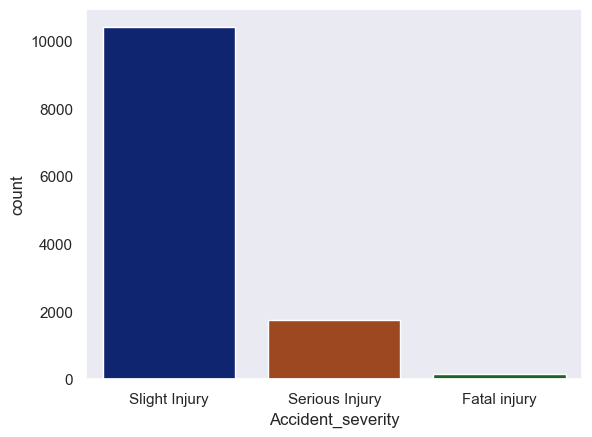

In [89]:
print(df['Accident_severity'].value_counts())
sns.countplot(data=df, x='Accident_severity')